In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import os
for dirname, _, filenames in os.walk('/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
plt.style.use('ggplot')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
data = pd.read_csv('/Users/fatimaanwar/Documents/Semester 7/Info Sec/Project/archive/dataset_malwares.csv')

In [4]:
data.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

In [6]:
used_data = data.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)

[Text(0, 0, 'Benign'), Text(1, 0, 'Malware')]

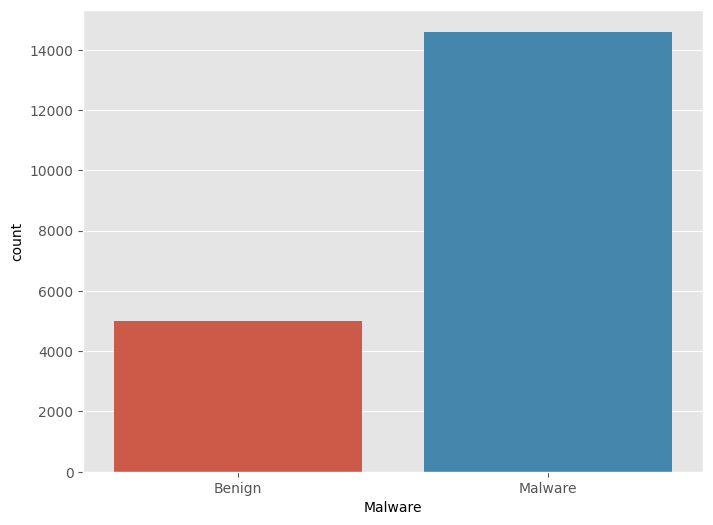

In [7]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Malware', data=data)
ax.set_xticklabels(['Benign', 'Malware'])


Splitting the dataset for training and testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(used_data, data['Malware'], test_size=0.2, random_state=0)
print(f'Number of used features is {X_train.shape[1]}')

Number of used features is 75


Building the model

In [9]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

In [10]:
y_pred = rfc.predict(X_test)

Saving the model 

In [11]:
pkl_filename = "rf_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc, file)

Load the test data